###Geomarketing 

### **Perfil do Empreendimento**

In [ ]:
% pip install geopandas
% pip install pointpats
% pip install pygeos

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from pointpats import PointPattern
from pointpats.centrography import mean_center, weighted_mean_center, std_distance
from sklearn.cluster import KMeans
from numpy import random

random.seed(1234)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Hackaton/

/content/gdrive/MyDrive/Hackaton


No handles with labels found to put in legend.


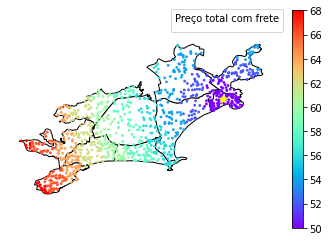

In [ ]:
#selecionar os dados
demanda =gpd.read_file("demanda.shp")
restaurante = gpd.read_file("restaurante.shp")
limite = gpd.read_file("bairros.shp")

#plotar os dados de demanda (pontos)
#os dados de demanda estão coloridos conforme preço total, considerando o frete
base = limite.plot(color='white', edgecolor='black')
restaurante1 = restaurante.plot(ax=base, marker = '*', color = 'yellow', markersize=75, zorder=10)
fig = demanda.plot(column = 'PRECO_TOT', cmap = 'rainbow', legend = 'True',ax=base, marker='o', markersize=3, zorder=5)
fig.set_axis_off()
fig.legend(title='Preço total com frete', loc=4,  bbox_to_anchor=(1.05, 1))

filepath = os.path.join('mapa1.jpg')
chart = base.get_figure()
chart.savefig(filepath, dpi=300)

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
No handles with labels found to put in legend.


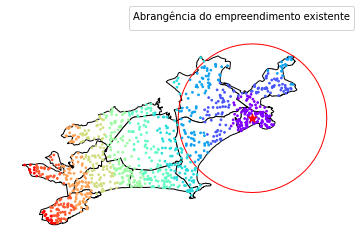

In [ ]:
#delimitar a abrangência viável de demanda do restaurante 1
abrangencia1 = restaurante.buffer(3000)

base = limite.plot(color='white', edgecolor='black')
restaurante1 = restaurante.plot(ax=base, marker = '*', color = 'red', markersize=75, zorder=10)
bfr = abrangencia1.plot(ax=base, color = '', edgecolor='red')
fig = demanda.plot(column = 'PRECO_TOT', cmap = 'rainbow', ax=base, marker='o', markersize=3, zorder=5)

fig.set_axis_off()
fig.legend(title='Abrangência do empreendimento existente', loc=4,  bbox_to_anchor=(1.05, 1))

filepath = os.path.join('mapa2.jpg')
chart = base.get_figure()
chart.savefig(filepath, dpi=300)

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
No handles with labels found to put in legend.


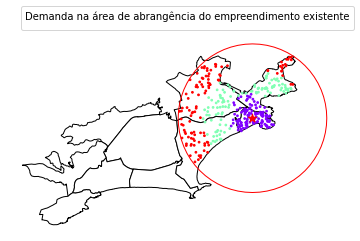

In [ ]:
#Selecionar os pontos da demanda viável do restaurante 1

polygon = abrangencia1.geometry[0]

demanda_r1 = demanda[demanda.within(polygon)]

base = limite.plot(color='white', edgecolor='black')
restaurante1 = restaurante.plot(ax=base, marker = '*', color = 'red', markersize=75, zorder=10)
bfr = abrangencia1.plot(ax=base, color = '', edgecolor='red')
fig = demanda_r1.plot(column = 'PRECO_TOT', cmap = 'rainbow', ax=base, marker='o', markersize=3, zorder=5)

fig.set_axis_off()
fig.legend(title='Demanda na área de abrangência do empreendimento existente', loc=4,  bbox_to_anchor=(1.05, 1))

filepath = os.path.join('mapa3.jpg')
chart = base.get_figure()
chart.savefig(filepath, dpi=300)

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
No handles with labels found to put in legend.


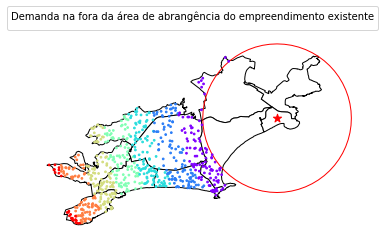

In [ ]:
#Selecionar o excedente de demanda do restaurante 1
demanda_r2 = demanda[demanda.disjoint(polygon)]

base = limite.plot(color='white', edgecolor='black')
restaurante1 = restaurante.plot(ax=base, marker = '*', color = 'red', markersize=75, zorder=10)
bfr = abrangencia1.plot(ax=base, color = '', edgecolor='red')
fig = demanda_r2.plot(column = 'PRECO_TOT', cmap = 'rainbow', ax=base, marker='o', markersize=3, zorder=5)

fig.set_axis_off()
fig.legend(title='Demanda na fora da área de abrangência do empreendimento existente', loc=4,  bbox_to_anchor=(1.05, 1))

filepath = os.path.join('mapa4.jpg')
chart = base.get_figure()
chart.savefig(filepath, dpi=300)

demanda_r2.reset_index(inplace=True, drop=True) 

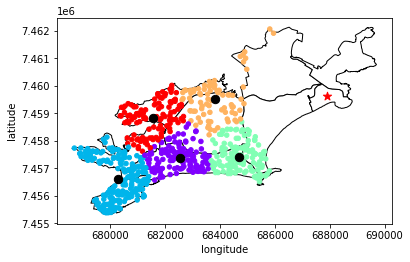

No handles with labels found to put in legend.


In [ ]:
#cluster para identificação de zonas de interesse (K-means) 

#Selecionando apenas campos geo 
demanda_r2_geo = gpd.GeoDataFrame(demanda_r2)

demanda_r2_geo['longitude'] = demanda_r2.centroid.map(lambda p: p.x)
demanda_r2_geo['latitude'] = demanda_r2.centroid.map(lambda p: p.y)

demanda_r2_geo = demanda_r2_geo[['longitude', 'latitude']]

#K-mean para identificar clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(demanda_r2_geo)

base = limite.plot(color='white', edgecolor='black')
restaurante1 = restaurante.plot(ax=base, marker = '*', color = 'red', markersize=75, zorder=10)
demanda_r2_geo.plot.scatter(x='longitude', y='latitude', cmap = 'rainbow', c = pred_y, ax=base, colorbar =None,zorder=5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='black', zorder=15)
plt.show()

base.set_axis_off()
base.legend(title='Clusters de demanda excedente', loc=4,  bbox_to_anchor=(1.05, 1))

filepath = os.path.join('mapa5.jpg')
chart = base.get_figure()
chart.savefig(filepath, dpi=300)

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Text(0.5, 0.98, 'Cluster 4')

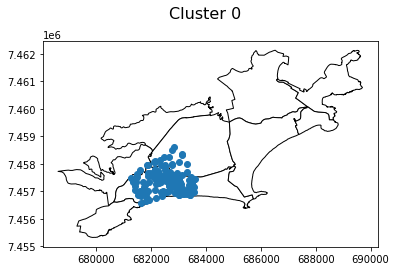

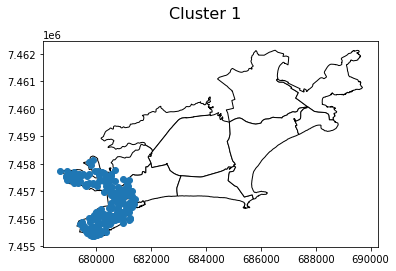

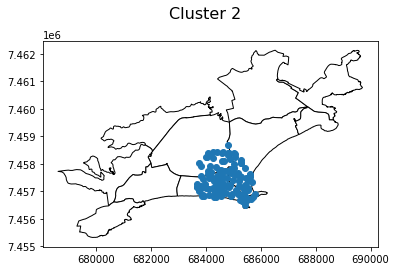

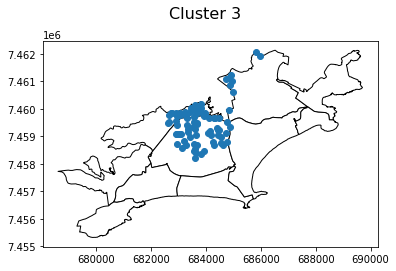

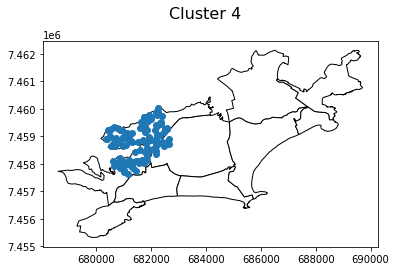

In [ ]:
demanda_r2['pred'] = pred_y

demanda_r2_c0 = demanda_r2[demanda_r2['pred']==0]
base = limite.plot(color='white', edgecolor='black')
demanda_r2_c0.plot(ax=base)
plt.suptitle('Cluster 0', fontsize=16)


demanda_r2_c1 = demanda_r2[demanda_r2['pred']==1]
base = limite.plot(color='white', edgecolor='black')
demanda_r2_c1.plot(ax=base)
plt.suptitle('Cluster 1', fontsize=16)

demanda_r2_c2 = demanda_r2[demanda_r2['pred']==2]
base = limite.plot(color='white', edgecolor='black')
demanda_r2_c2.plot(ax=base)
plt.suptitle('Cluster 2', fontsize=16)

demanda_r2_c3 = demanda_r2[demanda_r2['pred']==3]
base = limite.plot(color='white', edgecolor='black')
demanda_r2_c3.plot(ax=base)
plt.suptitle('Cluster 3', fontsize=16)

demanda_r2_c4 = demanda_r2[demanda_r2['pred']==4]
base = limite.plot(color='white', edgecolor='black')
demanda_r2_c4.plot(ax=base)
plt.suptitle('Cluster 4', fontsize=16)



In [ ]:
#pretar atenção, que o nome dos cluster pode mudar ao re-rodar o código
demanda_r2_up = demanda_r2.query('pred == [0, 1, 3]')
demanda_r2_up.reset_index(inplace=True, drop=True) 
demanda_r2_up

,CID,PRECO_TOT,geometry,longitude,latitude,pred
0,102,60.0,POINT (682205.492 7458817.619),682205.492332,7.458818e+06,0
1,103,64.0,POINT (680860.658 7458869.908),680860.657729,7.458870e+06,0
2,104,60.0,POINT (682223.519 7459035.133),682223.519166,7.459035e+06,0
3,106,62.0,POINT (681216.884 7459004.484),681216.883755,7.459004e+06,0
4,107,60.0,POINT (682532.275 7459285.688),682532.275351,7.459286e+06,0
...,...,...,...,...,...,...
422,687,60.0,POINT (683082.890 7457265.340),683082.889509,7.457265e+06,3
423,690,60.0,POINT (683409.130 7456880.607),683409.130209,7.456881e+06,3
424,695,60.0,POINT (683430.807 7456879.978),683430.807341,7.456880e+06,3
425,698,58.0,POINT (683483.431 7457373.094),683483.430864,7.457373e+06,3


In [ ]:
#Ponto médio geográfico da demanda excedente ponderado pelo preco total
colunas_selecionadas = ['longitude','latitude']
points = pd.DataFrame(demanda_r2_up.filter(items=colunas_selecionadas))
points[['longitude', 'latitude']].to_numpy()

#centrografia
pp = PointPattern(points)

#Media 
media = mean_center(pp.points)

#media ponderada
pesos_a = ['PRECO_TOT']
pesos = pd.DataFrame(demanda_r2_up.filter(items=pesos_a))

mediapond = weighted_mean_center(pp.points, pesos)

#Standard Distance
stdd = std_distance(pp.points)

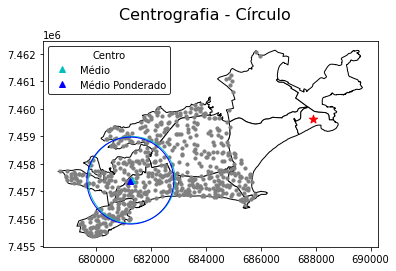

In [ ]:
#Plot

base = limite.plot(color='white', edgecolor='black')
restaurante1 = restaurante.plot(ax=base, marker = '*', color = 'red', markersize=75, zorder=10)
fig = demanda_r2.plot(ax=base, marker = 'o', color = 'grey', markersize=10, zorder=8)

circle1 = plt.Circle((media[0], media[1]),stdd,fill=False, color='c', label='1', zorder=10)
circle2 = plt.Circle((mediapond[0], mediapond[1]),stdd,fill=False, color='b', label='2', zorder=10)

plt.plot(media[0], media[1], 'c^', label='Médio', zorder=10)
plt.plot(mediapond[0], mediapond[1], 'b^', label='Médio Ponderado', zorder=10)

plt.gcf().gca().add_artist(circle1)
plt.gcf().gca().add_artist(circle2)

plt.suptitle('Centrografia - Círculo', fontsize=16)

plt.legend(loc='best', title='Centro', numpoints=1, facecolor='white', edgecolor='black')

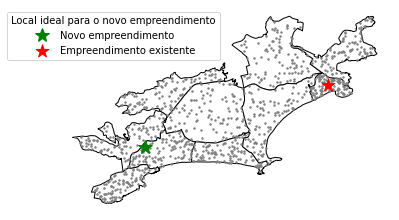

In [ ]:
#Plot do local ideal para o novo empreendimento
base = limite.plot(color='white', edgecolor='black')
restaurante1 = restaurante.plot(ax=base, marker = '*', color = 'red', markersize=180, label = 'Empreendimento existente',zorder=10)
restaurante2 = plt.plot(mediapond[0], mediapond[1], '*',  color = 'green', label = 'Novo empreendimento',markersize=15,zorder=10)

fig = demanda.plot(color='grey', ax=base, marker='o', markersize=2, zorder=5)

fig.set_axis_off()
fig.legend(title='Local ideal para o novo empreendimento', loc=0,  bbox_to_anchor=(.5, 1))

filepath = os.path.join('mapa6.jpg')
chart = base.get_figure()
chart.savefig(filepath, dpi=300)

### **Perfil da Região**


Potencial de Consumo - Análise multi-temporal

In [ ]:
potencial_consumo = gpd.read_file("fishnet_clip.shp") 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


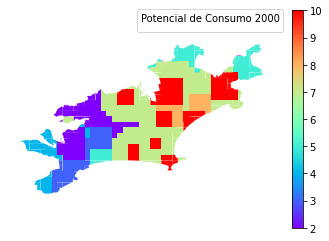

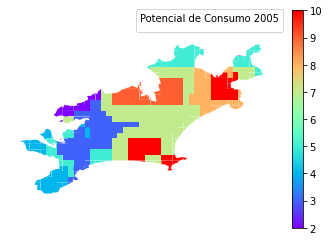

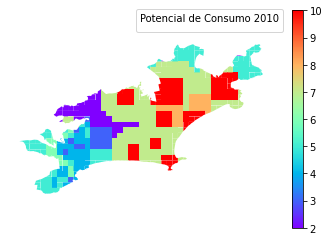

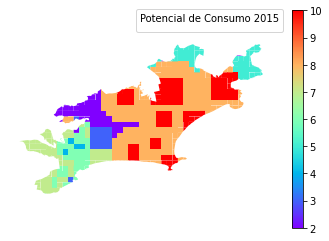

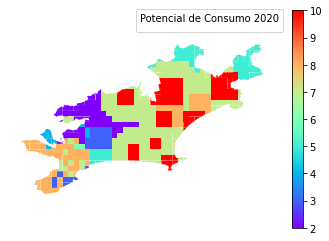

In [ ]:
lista_anos = ['2000', '2005', '2010', '2015', '2020']

for i in lista_anos:
  fig = potencial_consumo.plot(column=('pcon_')+i, cmap='rainbow', legend='True')
  fig.set_axis_off()
  fig.legend(title=('Potencial de Consumo '+ i), loc=4,  bbox_to_anchor=(1.05, 1))

  filepath = os.path.join('PotConsumo_'+i+'.jpg')
  chart = fig.get_figure()
  chart.savefig(filepath, dpi=300)

In [ ]:
#Determinar o crescimento e/ou diminuição do potencial de consumo ao longo dos anos
potencial_consumo['cresc_1'] = potencial_consumo['pcon_2005'] - potencial_consumo['pcon_2000']
potencial_consumo['cresc_2'] = potencial_consumo['pcon_2010'] - potencial_consumo['pcon_2005']
potencial_consumo['cresc_3'] = potencial_consumo['pcon_2015'] - potencial_consumo['pcon_2010']
potencial_consumo['cresc_4'] = potencial_consumo['pcon_2020'] - potencial_consumo['pcon_2015']
potencial_consumo

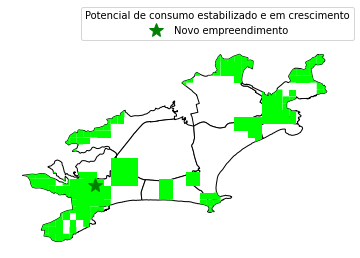

In [ ]:
potencial_consumo_crescimento = potencial_consumo[(potencial_consumo.cresc_1 >= 0) & (potencial_consumo.cresc_2 >= 0) & (potencial_consumo.cresc_3 >= 0) & (potencial_consumo.cresc_4 >= 0)]
base1 = potencial_consumo.plot(color='None')
base = limite.plot(ax = base1, color='white', edgecolor='black')
potencial_consumo_crescimento.plot(ax=base1, color='lime')
restaurante2 = plt.plot(mediapond[0], mediapond[1], '*',  color = 'green', label = 'Novo empreendimento',markersize=15,zorder=10)

base1.set_axis_off()
base1.legend(title='Potencial de consumo estabilizado e em crescimento', loc=4,  bbox_to_anchor=(1.05, 1))

filepath = os.path.join('mapa7.jpg')
chart = base.get_figure()
chart.savefig(filepath, dpi=300)